In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans , DBSCAN

In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=a9f70a8627c68431438ae110b669c964c30939bfcc9509fa2f97d56f1995d29e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
data = pd.read_csv('/content/creditcard_2023.csv')

In [4]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [5]:
data.shape

(36751, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36751 entries, 0 to 36750
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      36751 non-null  int64  
 1   V1      36751 non-null  float64
 2   V2      36751 non-null  float64
 3   V3      36751 non-null  float64
 4   V4      36751 non-null  float64
 5   V5      36751 non-null  float64
 6   V6      36751 non-null  float64
 7   V7      36751 non-null  float64
 8   V8      36751 non-null  float64
 9   V9      36751 non-null  float64
 10  V10     36751 non-null  float64
 11  V11     36751 non-null  float64
 12  V12     36751 non-null  float64
 13  V13     36751 non-null  float64
 14  V14     36751 non-null  float64
 15  V15     36750 non-null  float64
 16  V16     36750 non-null  float64
 17  V17     36750 non-null  float64
 18  V18     36750 non-null  float64
 19  V19     36750 non-null  float64
 20  V20     36750 non-null  float64
 21  V21     36750 non-null  float64
 22

In [7]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [8]:
data[data['V21'].isna()]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
36750,36750,-0.473949,0.176547,-0.121846,-0.20643,-0.107354,-0.190868,0.381093,0.184401,0.165628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## check the number of fraudulent  and not
fraudulent = data[data['Class']==1].shape[0]
not_fraudulent = data[data['Class']==0].shape[0]

In [10]:
data['Class'].value_counts()

0.0    36647
1.0      103
Name: Class, dtype: int64

In [11]:
fraudulent , not_fraudulent

(103, 36647)

In [12]:
data.drop([36750],axis=0,inplace=True)

In [13]:
data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

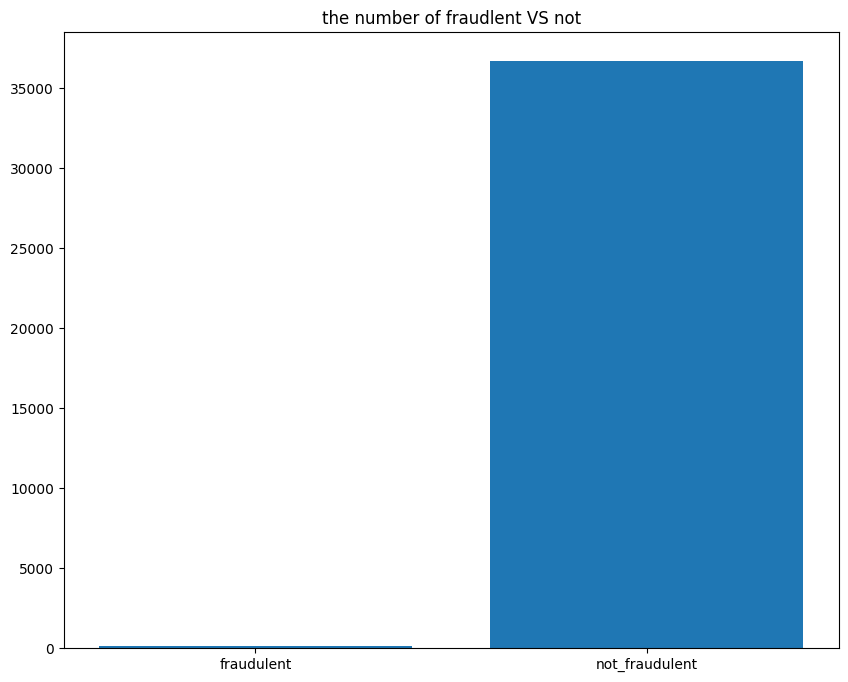

In [14]:
plt.figure(figsize=(10,8))
plt.bar(['fraudulent' , 'not_fraudulent'],[fraudulent , not_fraudulent])
plt.title("the number of fraudlent VS not")
plt.show()

In [15]:
data.drop('id',axis=1,inplace=True)

In [16]:
data.shape

(36750, 30)

In [17]:
x = data.drop('Class',axis=1)
y = data['Class']

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , shuffle=True, random_state=40, stratify=y)

# check outliers

<Figure size 1600x800 with 0 Axes>

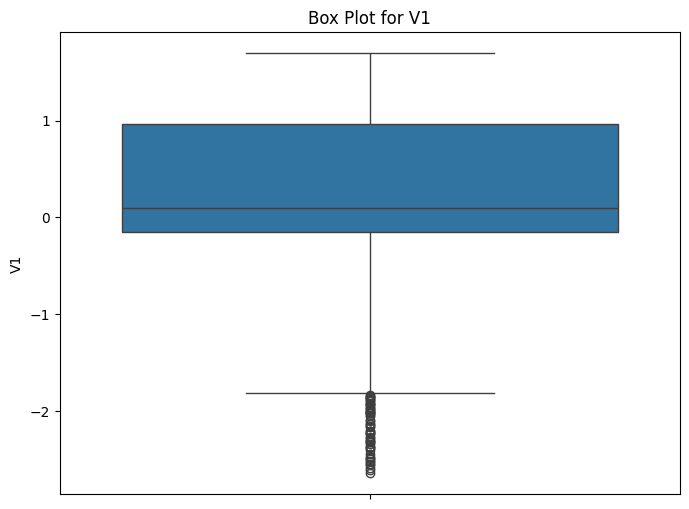

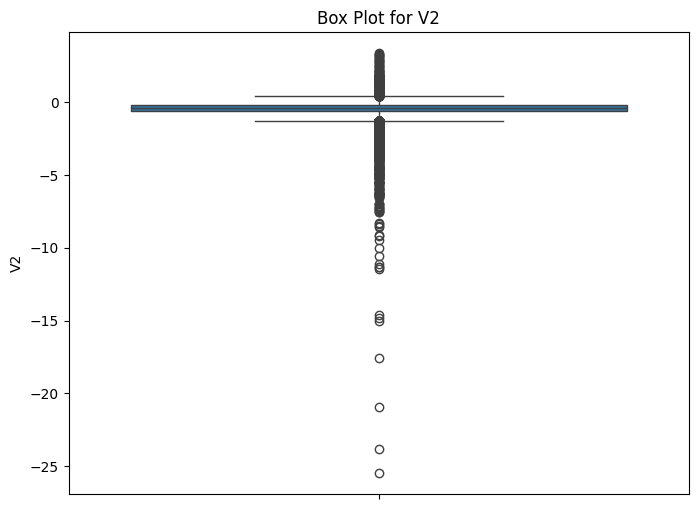

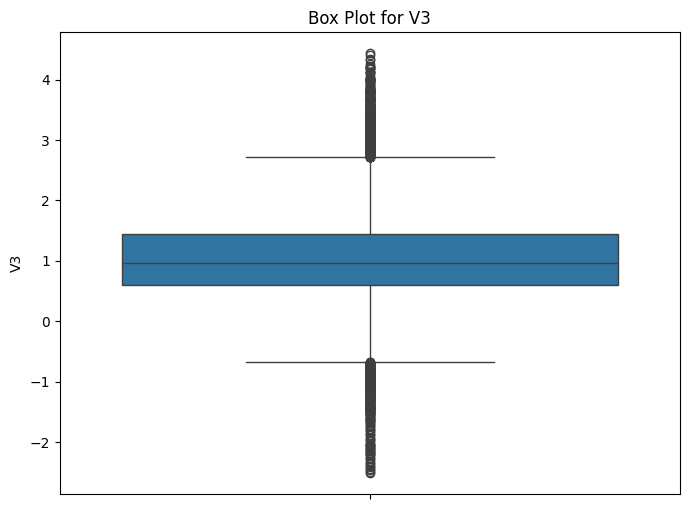

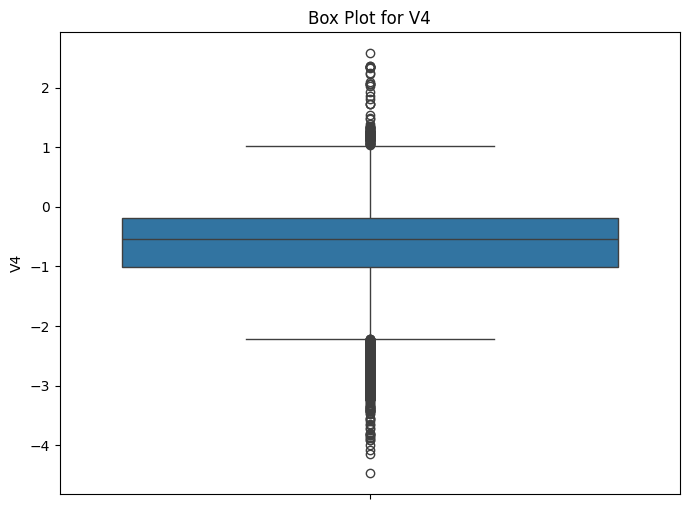

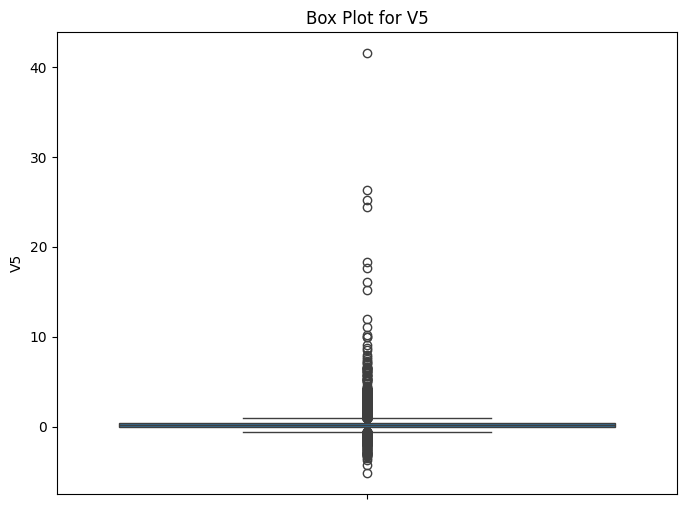

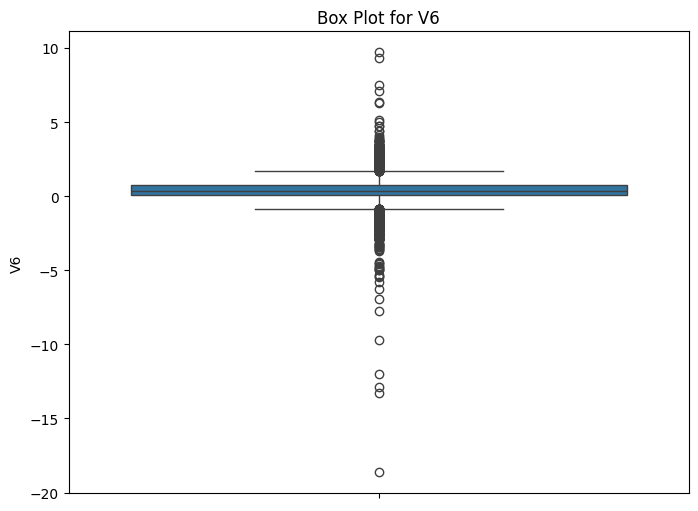

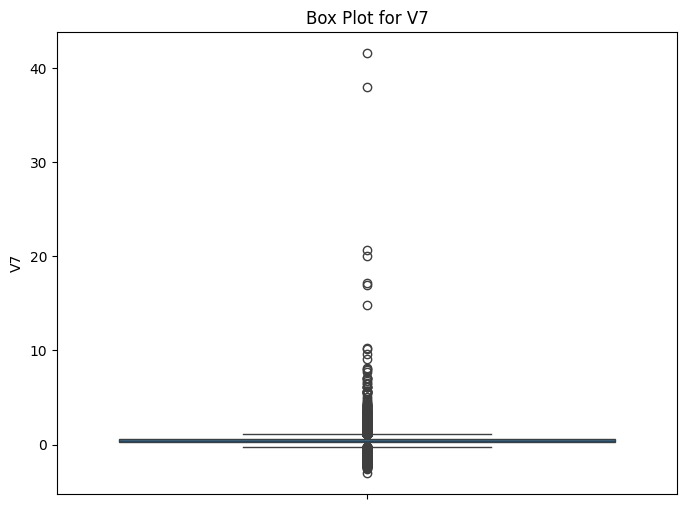

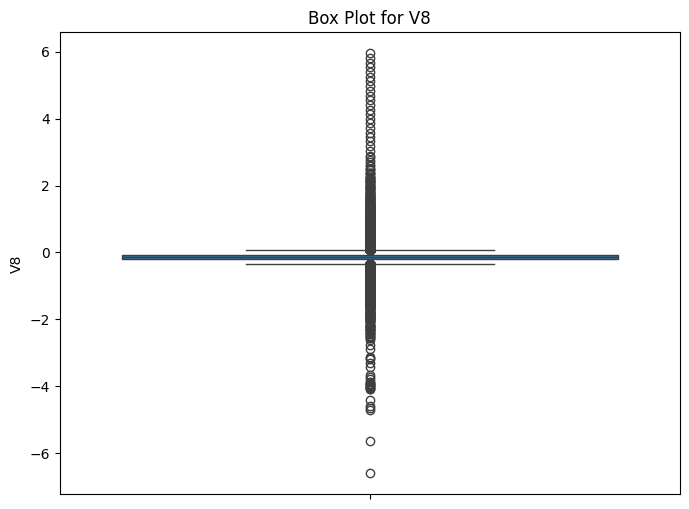

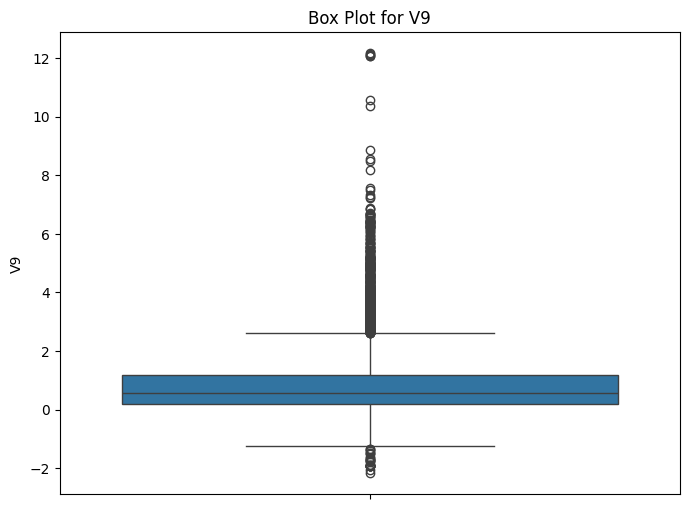

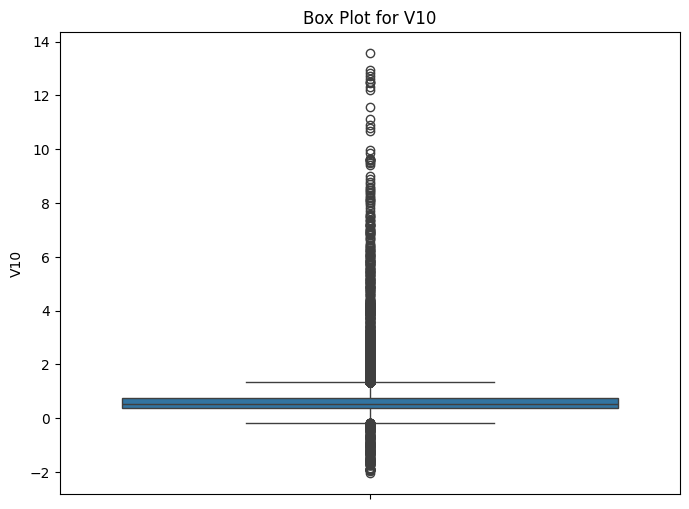

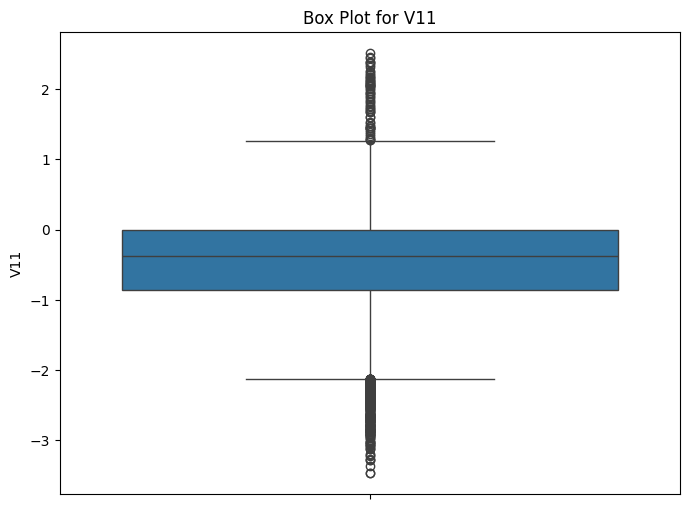

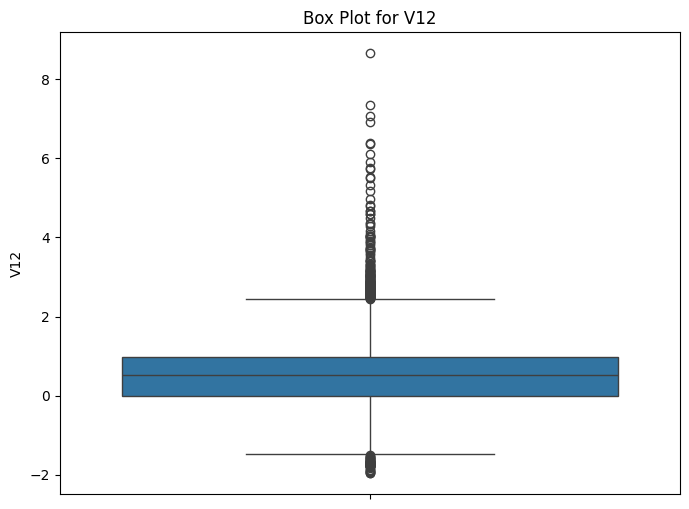

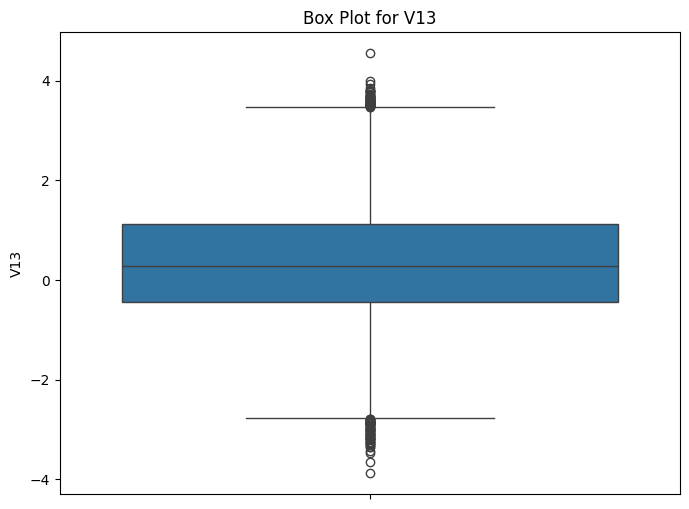

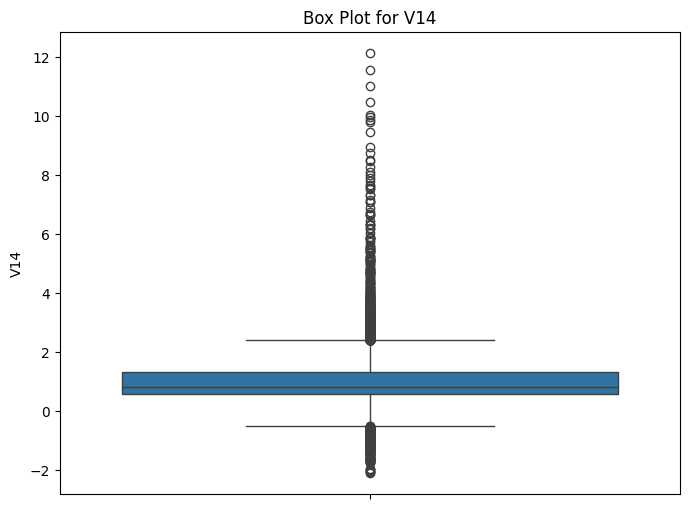

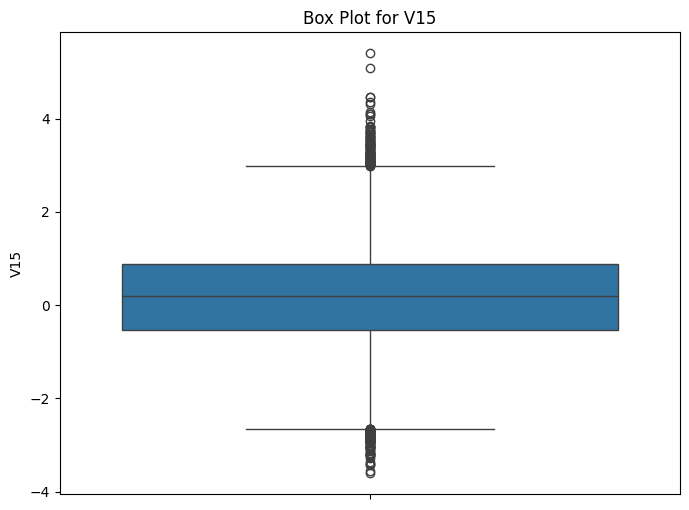

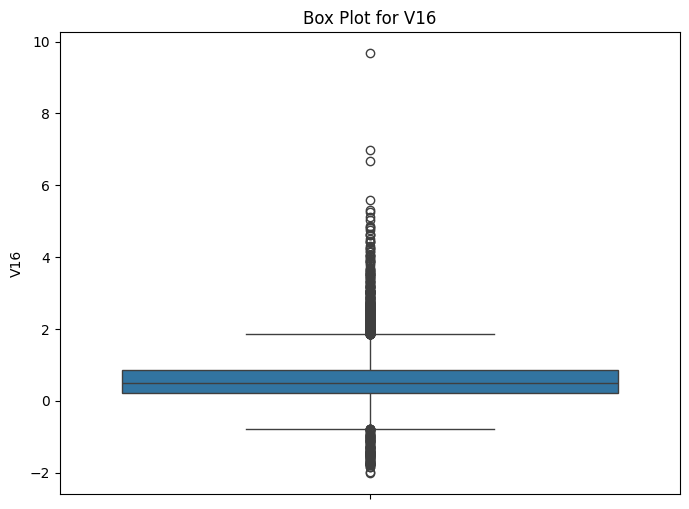

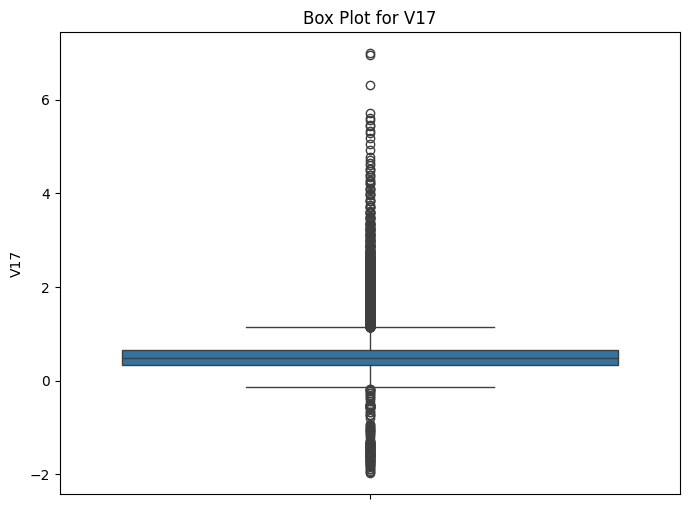

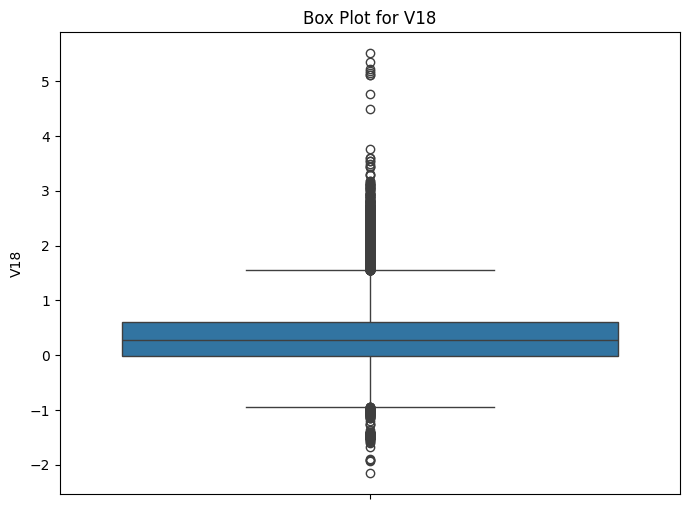

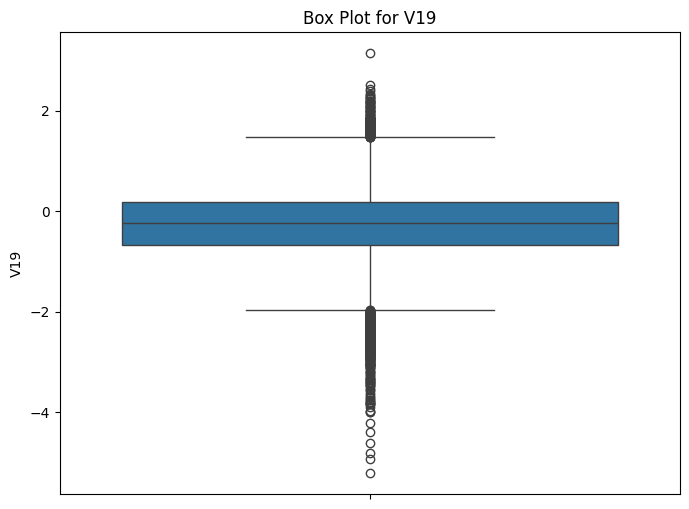

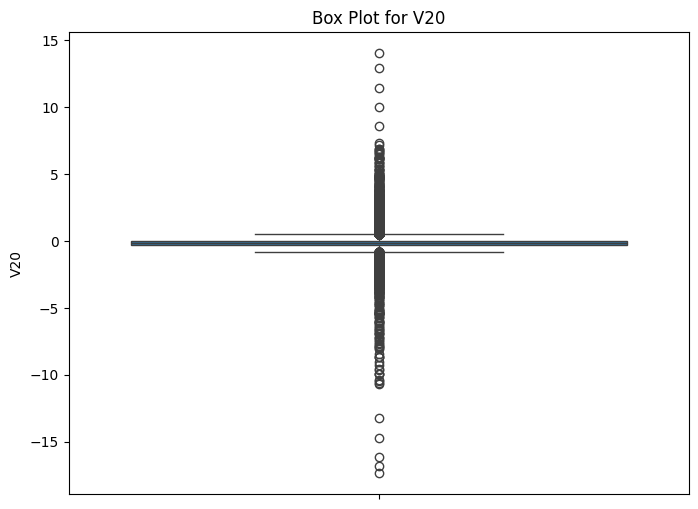

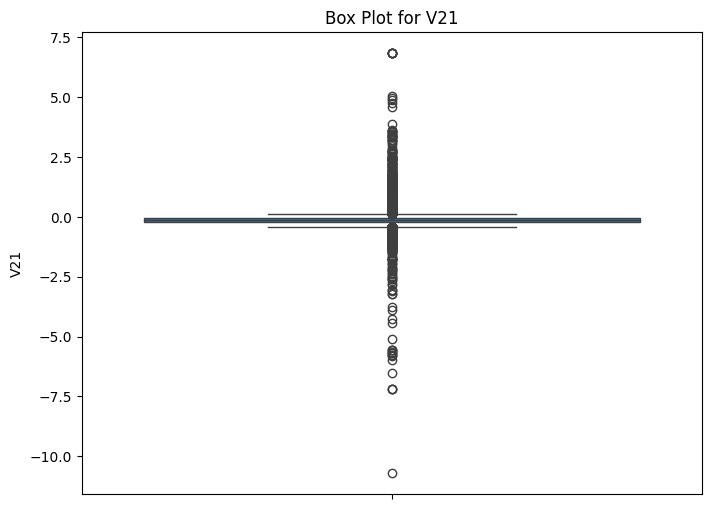

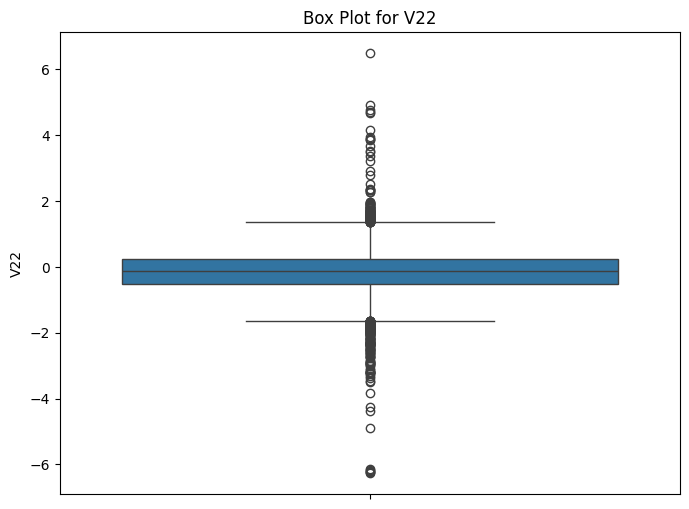

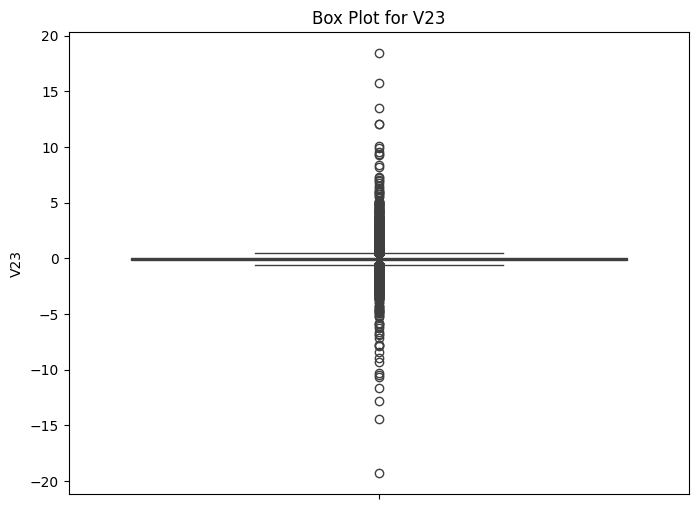

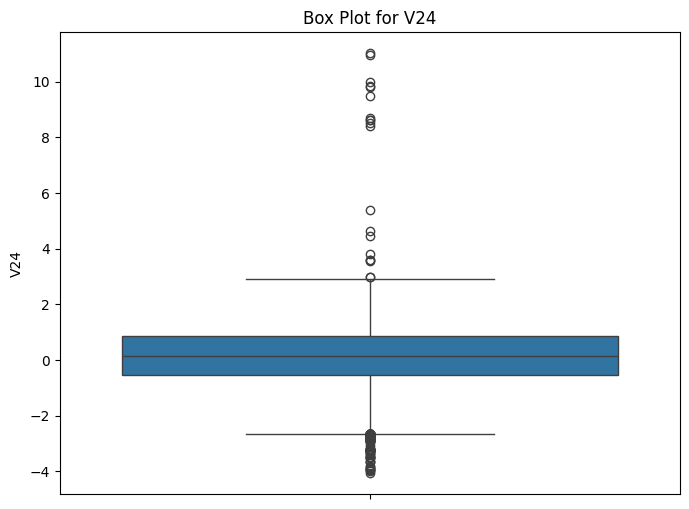

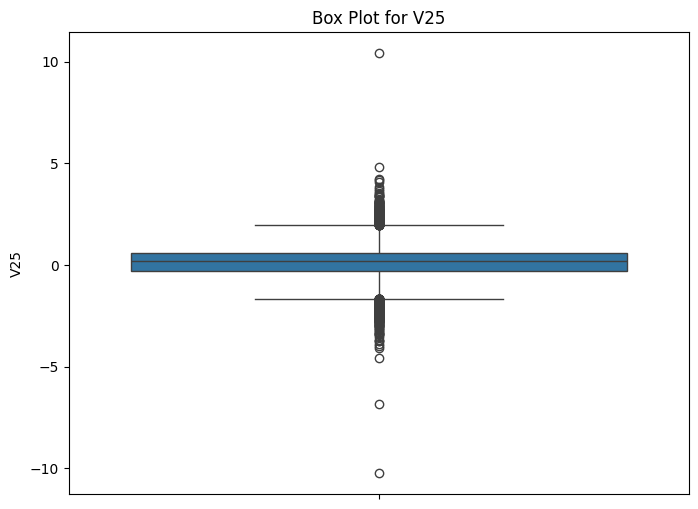

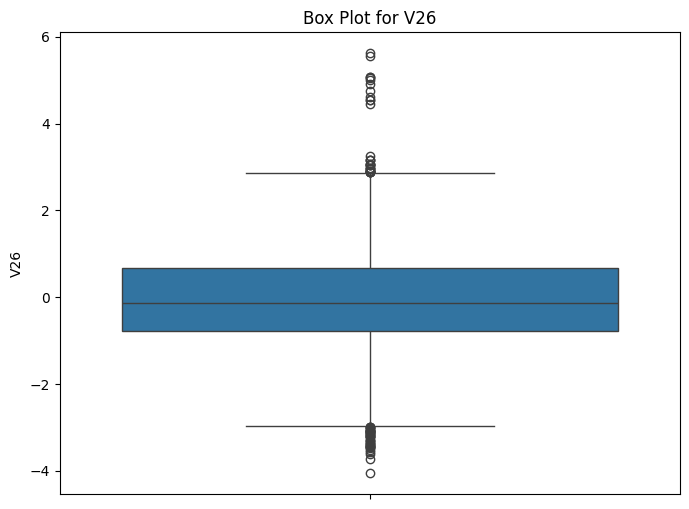

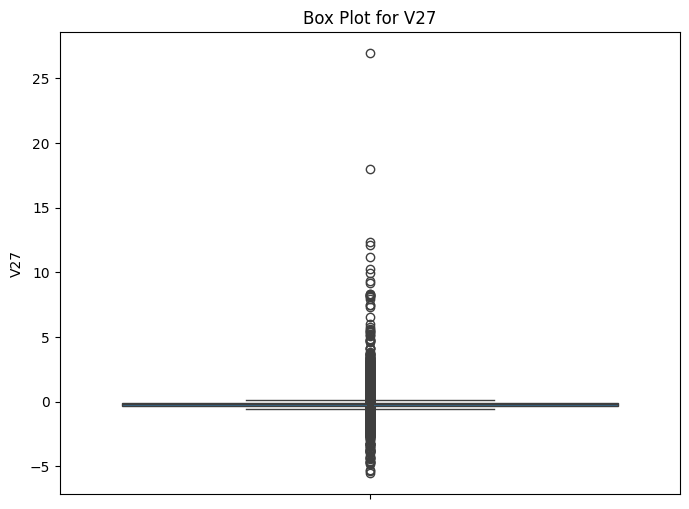

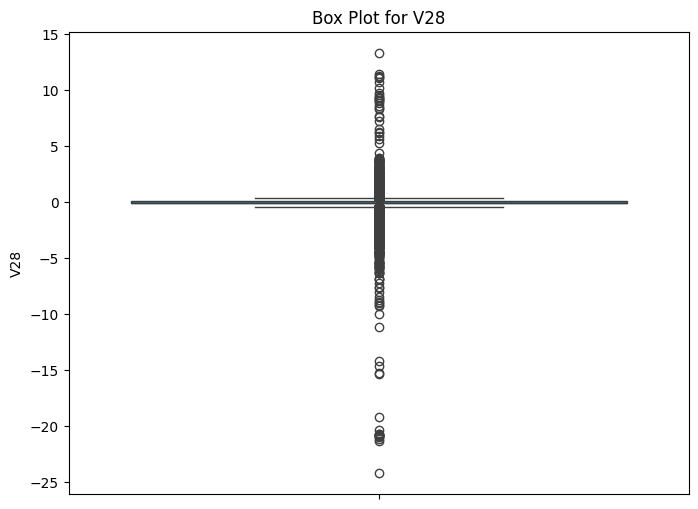

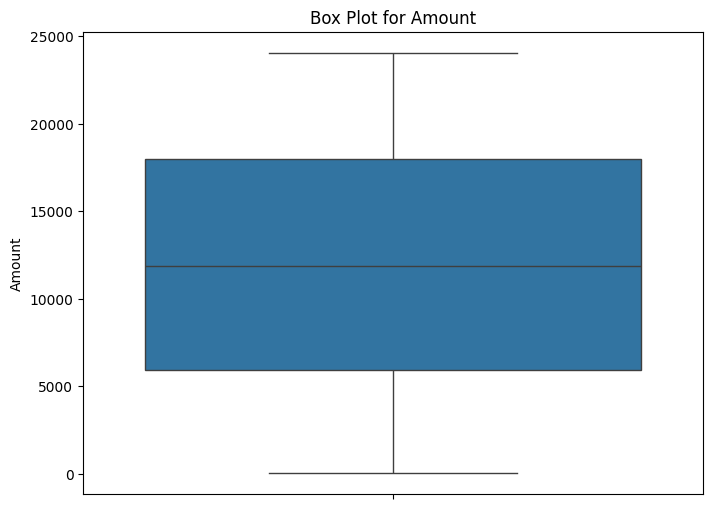

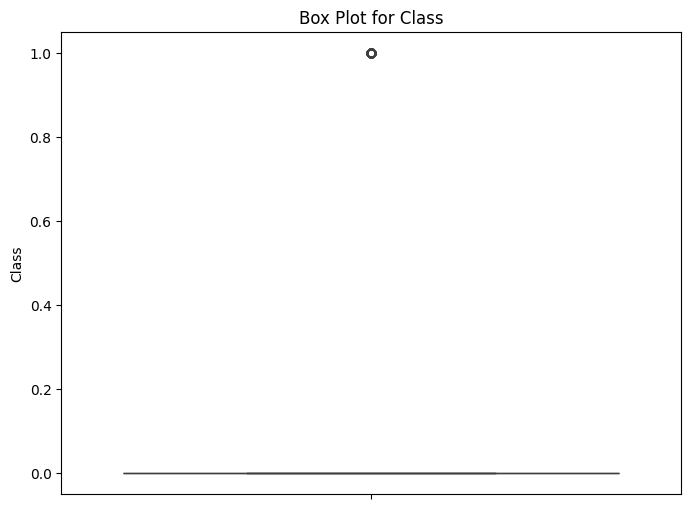

In [19]:
# Set the size of the figure
plt.figure(figsize=(16, 8))

# Iterate through each numerical feature and create a box plot
for column in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])  # Use 'y' instead of 'x'
    plt.title(f'Box Plot for {column}')
    plt.show()

# kmeans model

In [31]:
kmeans = KMeans(n_clusters=2,n_init='auto')

In [40]:
kmeans.fit(x_train)

KMeans(n_clusters=2, n_init='auto')

In [39]:
y_predict= kmeans.fit_predict(x)

In [33]:
kmeans.cluster_centers_

array([[ 3.34675271e-01, -4.61968458e-01,  1.05505856e+00,
        -6.45152200e-01,  2.45173268e-01,  4.93794502e-01,
         4.42649322e-01, -1.35820798e-01,  7.65106149e-01,
         6.27998211e-01, -4.67847198e-01,  5.40724257e-01,
         3.54837194e-01,  9.96411519e-01,  1.44122893e-01,
         5.78967120e-01,  5.39864375e-01,  3.49943763e-01,
        -2.78250463e-01, -1.42711216e-01, -1.19247932e-01,
        -1.24131439e-01, -5.29178673e-02,  1.42541812e-01,
         1.50890448e-01, -2.39725837e-02, -2.09799455e-01,
        -8.88740909e-02,  6.10170244e+03],
       [ 3.23572284e-01, -4.62917493e-01,  1.05279580e+00,
        -6.42504388e-01,  2.44192678e-01,  4.89515993e-01,
         4.47415450e-01, -1.37595962e-01,  7.59826367e-01,
         6.44928269e-01, -4.70334445e-01,  5.44229550e-01,
         3.66002497e-01,  9.98918316e-01,  1.34575878e-01,
         5.76748151e-01,  5.43522150e-01,  3.48202878e-01,
        -2.72624858e-01, -1.32360333e-01, -1.22286642e-01,
        -1.25

In [67]:
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [35]:
kmeans.inertia_

328586213692.1518

In [36]:
kmeans.predict(x_test[0:20])

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int32)

In [37]:
y_test[0:20]

22462    0.0
36695    0.0
14223    0.0
17018    0.0
631      0.0
9138     0.0
10035    0.0
6167     0.0
24909    0.0
16902    0.0
30732    0.0
23127    0.0
12294    0.0
16362    0.0
9319     0.0
9327     0.0
32244    0.0
1565     0.0
36527    0.0
11200    0.0
Name: Class, dtype: float64

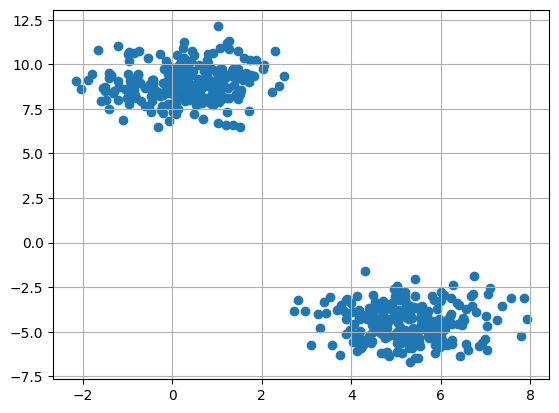

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 500,n_features = 2,centers = 2,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

# DBSCAN model

In [49]:
from sklearn.cluster import DBSCAN

# model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# the number of clusters found by DBSCAN
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")
# Number of clusters found by DBSCAN: 2

Number of clusters found by DBSCAN: 2


In [52]:
print(pd.unique(dbscan.labels_))

[-1]


In [51]:
dbscan.fit_predict(x_test[0:30])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

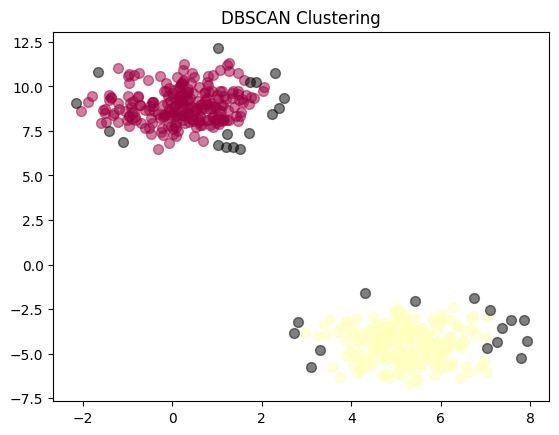

In [53]:
import numpy as np

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points (label=-1)
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

plt.title('DBSCAN Clustering')
plt.show()


# Fuzzy Cmeans model

In [ ]:
from skfuzzy.cluster import cmeans

In [ ]:
centers, u, u0, d, jm, p, fpc = cmeans(x_train,2,2,0.001,maxiter=1000)

In [ ]:
centers

array([[-1.12988228e-01,  2.35903840e-01,  2.58049550e-02, ...,
         8.57134139e-02,  2.38257602e-01,  1.05040847e-01],
       [ 3.83872000e+03,  2.45197000e+03,  2.14378300e+04, ...,
         6.14891000e+03,  1.61471900e+04,  1.95018200e+04]])

In [ ]:
u

array([[9.99999998e-01, 9.99999995e-01, 9.99999994e-01, 9.99999994e-01,
        9.99999998e-01, 9.99999997e-01, 9.99999998e-01, 9.99999999e-01,
        9.99999996e-01, 9.99999997e-01, 9.99999995e-01, 9.99999996e-01,
        9.99999995e-01, 9.99999996e-01, 9.99999995e-01, 9.99999998e-01,
        9.99999999e-01, 9.99999998e-01, 9.99999997e-01, 9.99999996e-01,
        9.99999999e-01, 9.99999998e-01, 9.99999998e-01, 9.99999994e-01,
        9.99999997e-01, 9.99999994e-01, 9.99999998e-01, 9.99999997e-01,
        5.20679657e-20],
       [2.16648098e-09, 4.90015267e-09, 6.11666835e-09, 5.50891735e-09,
        2.05707145e-09, 3.10844999e-09, 2.05469729e-09, 8.38554332e-10,
        3.59853894e-09, 3.05316863e-09, 4.67679448e-09, 3.84148936e-09,
        5.49785035e-09, 4.00831531e-09, 5.37939738e-09, 2.43055133e-09,
        1.19935887e-09, 1.87842951e-09, 3.45835678e-09, 3.53920669e-09,
        9.28789056e-10, 2.06813257e-09, 2.36390053e-09, 6.00793026e-09,
        2.59261202e-09, 5.98775619e-09,

In [ ]:
u0

array([[0.54016041, 0.89945013, 0.59169383, 0.33234941, 0.888083  ,
        0.99028866, 0.65016432, 0.38650581, 0.58959832, 0.64345967,
        0.73439527, 0.55924142, 0.20894337, 0.0549898 , 0.5660044 ,
        0.39694915, 0.43761349, 0.4988176 , 0.44510919, 0.6123958 ,
        0.42270128, 0.49596262, 0.88972778, 0.52664851, 0.27084269,
        0.69358124, 0.4294184 , 0.28635629, 0.49626453],
       [0.45983959, 0.10054987, 0.40830617, 0.66765059, 0.111917  ,
        0.00971134, 0.34983568, 0.61349419, 0.41040168, 0.35654033,
        0.26560473, 0.44075858, 0.79105663, 0.9450102 , 0.4339956 ,
        0.60305085, 0.56238651, 0.5011824 , 0.55489081, 0.3876042 ,
        0.57729872, 0.50403738, 0.11027222, 0.47335149, 0.72915731,
        0.30641876, 0.5705816 , 0.71364371, 0.50373547]])

In [ ]:
d

array([[1.71120937e+02, 2.57366844e+02, 2.87517524e+02, 2.72888277e+02,
        1.66744954e+02, 2.04971127e+02, 1.66646333e+02, 1.06464121e+02,
        2.20537254e+02, 2.03138302e+02, 2.51433843e+02, 2.27857815e+02,
        2.72601457e+02, 2.32751343e+02, 2.69646000e+02, 1.81247071e+02,
        1.27319557e+02, 1.59339037e+02, 2.16210191e+02, 2.18721174e+02,
        1.12045884e+02, 1.67196248e+02, 1.78751595e+02, 2.84965617e+02,
        1.87196976e+02, 2.84489647e+02, 1.62215054e+02, 2.14295444e+02,
        3.67645935e+06],
       [3.67642499e+06, 3.67661192e+06, 3.67626536e+06, 3.67664543e+06,
        3.67644447e+06, 3.67638297e+06, 3.67639221e+06, 3.67652624e+06,
        3.67636700e+06, 3.67634636e+06, 3.67662715e+06, 3.67632681e+06,
        3.67647582e+06, 3.67630264e+06, 3.67643733e+06, 3.67636478e+06,
        3.67638126e+06, 3.67641674e+06, 3.67655665e+06, 3.67652789e+06,
        3.67652362e+06, 3.67652344e+06, 3.67650641e+06, 3.67646149e+06,
        3.67646185e+06, 3.67649866e+06,

In [ ]:
jm

array([6.55786410e+12, 6.47023792e+12, 4.98049199e+12, 6.38414905e+11,
       1.28180292e+06])

In [ ]:
p

5

In [ ]:
fpc

0.9999999934754669

# Hierarchy model

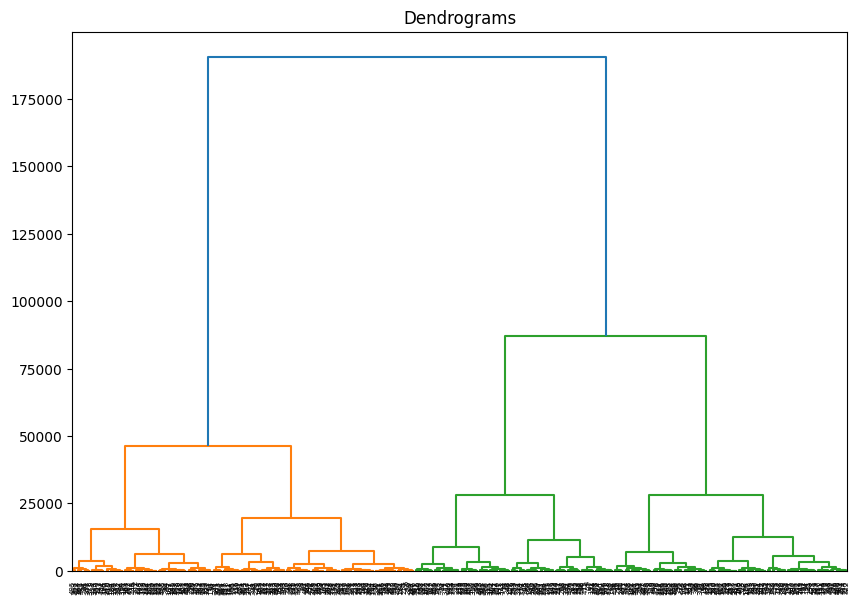

In [69]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))